In [1]:
import numpy as np
import matplotlib.pyplot as plt
from json import JSONDecoder
from functools import partial
import json
from prettytable import PrettyTable
from scipy import stats

In [6]:
with open('results/json/bc_bounds.json') as json_file:  
    data = json.load(json_file)
    
# constant values
weak_error_bound = data['Weak_signal_ub'][0]
weak_test_accuracy = data['Weak_test_accuracy'][0]

#variables
error_bound = np.array(data['Error bound'])
accuracy = np.array(data['Accuracy'])
ineq_constraint = np.array(data['Ineq constraint'])

index = ineq_constraint <= 0
x_values = np.linspace(0,1,100)
weak_x = weak_error_bound
weak_y = weak_test_accuracy

plt.title("Test error on breast cancer dataset")
plt.xlabel("Bounds")
plt.ylabel("Error")
plt.plot(x_values[index],error_bound[index])
plt.xlim(0.0,1.0)
plt.savefig('results/bc_error.pdf')
plt.show()

plt.title("Test accuracy on breast cancer dataset")
plt.xlabel("Bounds")
plt.ylabel("Accuracy")
plt.plot(x_values[index], accuracy[index])
plt.plot(weak_x, weak_y, marker='o')
plt.axvline(weak_x, color='orange', linestyle='--')
plt.axhline(weak_y, color='orange', linestyle='--')
plt.text(weak_x + 0.01, weak_y +0.05,'weak signal accuracy',rotation=90)
plt.xlim(0.0,1.0)
plt.savefig('results/bc_accuracy.pdf')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'results/json/bc_bounds.json'

In [7]:
with open('results/json/obs_bounds.json') as json_file:  
    data = json.load(json_file)
    
# constant values
weak_error_bound = data['Weak_signal_ub'][0]
weak_test_accuracy = data['Weak_test_accuracy'][0]

#variables
error_bound = np.array(data['Error bound'])
accuracy = np.array(data['Accuracy'])
ineq_constraint = np.array(data['Ineq constraint'])

index = ineq_constraint <= 0
x_values = np.linspace(0,1,100)
weak_x = weak_error_bound
weak_y = weak_test_accuracy

plt.title("Test error on obs dataset")
plt.xlabel("Bounds")
plt.ylabel("Error")
plt.plot(x_values[index],error_bound[index])
plt.xlim(0.0,1.0)
plt.savefig('results/obs_error.pdf')
plt.show()

plt.title("Test accuracy on obs dataset")
plt.xlabel("Bounds")
plt.ylabel("Accuracy")
plt.plot(x_values[index], accuracy[index])
plt.xlim(0.0,1.0)
plt.plot(weak_x, weak_y, marker='o')
plt.axvline(weak_x, color='orange', linestyle='--')
plt.axhline(weak_y, color='orange', linestyle='--')
plt.text(weak_x + 0.01, weak_y +0.01,'weak signal accuracy',rotation=90)
plt.savefig('results/obs_accuracy.pdf')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'results/json/obs_bounds.json'

In [2]:
def json_parse(fileobj, decoder=JSONDecoder(), buffersize=2048):
    buffer = ''
    for chunk in iter(partial(fileobj.read, buffersize), ''):
        buffer += chunk
        while buffer:
            try:
                result, index = decoder.raw_decode(buffer)
                yield result
                buffer = buffer[index:]
            except ValueError:
                # Not enough data to decode, read more
                break

In [3]:
# load results
def load_results(filename):
    results = []
    with open(filename, 'r') as content:
        for data in json_parse(content):
            results.append(data)
    return results

In [4]:
def printResults(accuracies, start, end):
    # accuracies is a dictionary containing accuracies of all and every baseline
    
    all_model = accuracies['all_accuracy']
    weak_model = accuracies['weak_accuracy']
    baseline_model = accuracies['baseline_accuracy']
    ge_model = accuracies['gecriteria_accuracy']
    
    # adjust these if experiment structure changes
    index = [i for i in range(start, end, 2)]
    fixed_b_index = [j for j in range(start + 1, end, 2)]
    
    # calculate mean of all results    
    all_mean = np.mean(all_model[:, index], axis=1)
    all_fixed_b_mean = np.mean(all_model[:, fixed_b_index], axis=1)
    
    weak_mean = np.mean(weak_model[:, index], axis=1)
    weak_fixed_b_mean = np.mean(weak_model[:, fixed_b_index], axis=1)
    
    baseline_mean = np.mean(baseline_model[:, index], axis=1)
    baseline_fixed_b_mean = np.mean(baseline_model[:, fixed_b_index], axis=1)
    
    ge_mean = np.mean(ge_model[:, index], axis=1)
    ge_fixed_b_mean = np.mean(ge_model[:, fixed_b_index], axis=1)
    
    # calculate error of the all model
    num_of_experiments = int(end - start)/2
    assert all_model[:, index].shape[1] == num_of_experiments
    all_error = np.std(all_model[:, index], axis=1) / num_of_experiments
    all_fixed_b_error = np.std(all_model[:, fixed_b_index], axis=1) / num_of_experiments
    
    x = PrettyTable()

    x.field_names = ["Model", "VAL-1", "VAL-2", "VAL-3", "TEST-1", "TEST-2", "TEST-3",]

    x.add_row(['ALL'] + ["{:0.3f}".format(member) for member in all_mean])
    x.add_row(['ALL-E'] + ["{:0.3f}".format(member) for member in all_error])
    x.add_row(['GE'] + ["{:0.3f}".format(member) for member in ge_mean])
    x.add_row(['WS'] + ["{:0.3f}".format(member) for member in weak_mean])
    x.add_row(['BS'] + ["{:0.3f}".format(member) for member in baseline_mean])

    print(x)
    print("Fixed bound results...")
    x.clear_rows()
    x.add_row(['ALL-FB'] + ["{:0.3f}".format(member) for member in all_fixed_b_mean])
    x.add_row(['ALL-E-FB'] + ["{:0.3f}".format(member) for member in all_fixed_b_error])
    x.add_row(['GE-FB'] + ["{:0.3f}".format(member) for member in ge_fixed_b_mean])
    x.add_row(['WS-FB'] + ["{:0.3f}".format(member) for member in weak_fixed_b_mean])
    x.add_row(['BS-FB'] + ["{:0.3f}".format(member) for member in baseline_fixed_b_mean])
    
    print(x)

In [5]:
breast_cancer = load_results('results/json/breast_cancer.json')
cardio = load_results('results/json/cardio.json')
clave_direction = load_results('results/json/clave_direction.json')
credit_card = load_results('results/json/credit-card.json')
fashion_mnist = load_results('results/json/fashion-mnist.json')
obs_network = load_results('results/json/obs_network.json')
phishing = load_results('results/json/phishing.json')
statlog_satellite = load_results('results/json/statlog-satellite.json')
gamma_telescope = load_results('results/json/gamma-telescope.json')
winequality = load_results('results/json/winequality.json')

assert len(breast_cancer) == 60
assert len(cardio) == 60
assert len(clave_direction) == 60
assert len(credit_card) == 60
assert len(obs_network) == 60
assert len(phishing) == 60
assert len(statlog_satellite) == 60
assert len(gamma_telescope) == 60
assert len(winequality) == 60
assert len(fashion_mnist) == 54

In [6]:
def calculate_results(dataset):
    #structure: val_1, val_2, val_3, test_1, test_2, test_3
    zeros = lambda n: [[] for _ in range(n)]
    all_val_1, all_val_2, all_val_3, all_test_1, all_test_2, all_test_3  = zeros(6)
    weak_val_1, weak_val_2, weak_val_3, weak_test_1, weak_test_2, weak_test_3  = zeros(6)
    base_val_1, base_val_2, base_val_3, base_test_1, base_test_2, base_test_3  = zeros(6)
    ge_val_1, ge_val_2, ge_val_3, ge_test_1, ge_test_2, ge_test_3  = zeros(6)
    
    def helper_method(start, end):
        
        num_weak_signals = 3
        num_of_experiments = (end - start)/num_weak_signals
        accuracies = {}
        test_accuracies = {}
        for i in range(start, end, num_weak_signals):
            baseline_temp = []
            weak_temp = []
            for j in range(num_weak_signals):
                k = i+j
                adversarial_model = dataset[k]['Adversarial model']
                weak_model = dataset[k]['Weak model']

                eval('all_val_'+str(j+1)).append(adversarial_model['validation_accuracy'])
                eval('all_test_'+str(j+1)).append(adversarial_model['test_accuracy'])
                
                eval('weak_val_'+str(j+1)).append(weak_model['validation_accuracy'][j])
                eval('weak_test_'+str(j+1)).append(weak_model['test_accuracy'][j])
                eval('base_val_'+str(j+1)).append(weak_model['baseline_val_accuracy'][0])
                eval('base_test_'+str(j+1)).append(weak_model['baseline_test_accuracy'][0])
                eval('ge_val_'+str(j+1)).append(weak_model['gecriteria_val_accuracy'])
                eval('ge_test_'+str(j+1)).append(weak_model['gecriteria_test_accuracy'])
        
        # save validation and test accuracies
        all_accuracy = np.array([all_val_1, all_val_2, all_val_3, all_test_1, all_test_2, all_test_3])
        weak_accuracy = np.array([weak_val_1, weak_val_2, weak_val_3, weak_test_1, weak_test_2, weak_test_3])
        baseline_accuracy = np.array([base_val_1, base_val_2, base_val_3, base_test_1, base_test_2, base_test_3])
        gecriteria_accuracy = np.array([ge_val_1, ge_val_2, ge_val_3, ge_test_1, ge_test_2, ge_test_3])
        
        accuracies['all_accuracy'] = all_accuracy
        accuracies['weak_accuracy'] = weak_accuracy
        accuracies['baseline_accuracy'] = baseline_accuracy
        accuracies['gecriteria_accuracy'] = gecriteria_accuracy
        
        # save just test accuracies
        all_test_accuracy = np.array([all_test_1, all_test_2, all_test_3])
        weak_test_accuracy = np.array([weak_test_1, weak_test_2, weak_test_3])
        baseline_test_accuracy = np.array([base_test_1, base_test_2, base_test_3])
        gecriteria_test_accuracy = np.array([ge_test_1, ge_test_2, ge_test_3])
        
        test_accuracies['all_test_accuracy'] = all_test_accuracy
        test_accuracies['weak_test_accuracy'] = weak_test_accuracy
        test_accuracies['baseline_test_accuracy'] = baseline_test_accuracy
        test_accuracies['gecriteria_test_accuracy'] = gecriteria_test_accuracy
        return accuracies, test_accuracies
    
    results = helper_method(0, len(dataset))
    return results

In [7]:
end = 20 #num_of experiments * 2
print("Breast Cancer dataset results")
accuracies, _ = calculate_results(breast_cancer)
printResults(accuracies, 0, end)
print()
print('--------------------------------------------------------------------------------')
print("Cardio dataset results")
accuracies,_ = calculate_results(cardio)
printResults(accuracies, 0, end)
print()
print('--------------------------------------------------------------------------------')
print("Clave direction dataset results")
accuracies,_ = calculate_results(clave_direction)
printResults(accuracies, 0, end)

Breast Cancer dataset results
+-------+-------+-------+-------+--------+--------+--------+
| Model | VAL-1 | VAL-2 | VAL-3 | TEST-1 | TEST-2 | TEST-3 |
+-------+-------+-------+-------+--------+--------+--------+
|  ALL  | 0.944 | 0.942 | 0.943 | 0.942  | 0.944  | 0.945  |
| ALL-E | 0.001 | 0.001 | 0.001 | 0.002  | 0.002  | 0.002  |
|   GE  | 0.938 | 0.938 | 0.939 | 0.936  | 0.936  | 0.935  |
|   WS  | 0.882 | 0.820 | 0.917 | 0.871  | 0.804  | 0.915  |
|   BS  | 0.889 | 0.881 | 0.898 | 0.889  | 0.885  | 0.896  |
+-------+-------+-------+-------+--------+--------+--------+
Fixed bound results...
+----------+-------+-------+-------+--------+--------+--------+
|  Model   | VAL-1 | VAL-2 | VAL-3 | TEST-1 | TEST-2 | TEST-3 |
+----------+-------+-------+-------+--------+--------+--------+
|  ALL-FB  | 0.944 | 0.941 | 0.943 | 0.940  | 0.941  | 0.944  |
| ALL-E-FB | 0.001 | 0.002 | 0.001 | 0.002  | 0.002  | 0.002  |
|  GE-FB   | 0.938 | 0.938 | 0.939 | 0.936  | 0.936  | 0.935  |
|  WS-FB   | 0

In [8]:
print("Credit card dataset results")
accuracies,_ = calculate_results(credit_card)
printResults(accuracies, 0, end)
print()
print('--------------------------------------------------------------------------------')
print("OBS Network dataset results")
accuracies,_ = calculate_results(obs_network)
printResults(accuracies, 0, end)
print()
print('--------------------------------------------------------------------------------')
print("Phishing dataset results")
accuracies,_ = calculate_results(phishing)
printResults(accuracies, 0, end)

Credit card dataset results
+-------+-------+-------+-------+--------+--------+--------+
| Model | VAL-1 | VAL-2 | VAL-3 | TEST-1 | TEST-2 | TEST-3 |
+-------+-------+-------+-------+--------+--------+--------+
|  ALL  | 0.685 | 0.686 | 0.686 | 0.697  | 0.696  | 0.697  |
| ALL-E | 0.001 | 0.001 | 0.001 | 0.003  | 0.002  | 0.003  |
|   GE  | 0.668 | 0.466 | 0.462 | 0.695  | 0.460  | 0.424  |
|   WS  | 0.656 | 0.569 | 0.579 | 0.659  | 0.572  | 0.557  |
|   BS  | 0.656 | 0.657 | 0.613 | 0.660  | 0.662  | 0.607  |
+-------+-------+-------+-------+--------+--------+--------+
Fixed bound results...
+----------+-------+-------+-------+--------+--------+--------+
|  Model   | VAL-1 | VAL-2 | VAL-3 | TEST-1 | TEST-2 | TEST-3 |
+----------+-------+-------+-------+--------+--------+--------+
|  ALL-FB  | 0.686 | 0.659 | 0.612 | 0.696  | 0.671  | 0.610  |
| ALL-E-FB | 0.001 | 0.004 | 0.002 | 0.002  | 0.004  | 0.004  |
|  GE-FB   | 0.668 | 0.460 | 0.472 | 0.695  | 0.458  | 0.445  |
|  WS-FB   | 0.6

In [9]:
print("Statlog satelite dataset results")
accuracies,_ = calculate_results(statlog_satellite)
printResults(accuracies, 0, end)
print()
print('--------------------------------------------------------------------------------')
print("Gamma telescope dataset results")
accuracies,_ = calculate_results(gamma_telescope)
printResults(accuracies, 0, end)
print()
print('--------------------------------------------------------------------------------')
print("Wine quality direction dataset results")
accuracies,_ = calculate_results(winequality)
printResults(accuracies, 0, end)

Statlog satelite dataset results
+-------+-------+-------+-------+--------+--------+--------+
| Model | VAL-1 | VAL-2 | VAL-3 | TEST-1 | TEST-2 | TEST-3 |
+-------+-------+-------+-------+--------+--------+--------+
|  ALL  | 0.466 | 0.928 | 0.932 | 0.470  | 0.933  | 0.936  |
| ALL-E | 0.002 | 0.001 | 0.000 | 0.002  | 0.001  | 0.001  |
|   GE  | 0.518 | 0.986 | 0.991 | 0.521  | 0.987  | 0.992  |
|   WS  | 0.650 | 0.775 | 0.876 | 0.660  | 0.775  | 0.880  |
|   BS  | 0.657 | 0.919 | 0.914 | 0.669  | 0.926  | 0.916  |
+-------+-------+-------+-------+--------+--------+--------+
Fixed bound results...
+----------+-------+-------+-------+--------+--------+--------+
|  Model   | VAL-1 | VAL-2 | VAL-3 | TEST-1 | TEST-2 | TEST-3 |
+----------+-------+-------+-------+--------+--------+--------+
|  ALL-FB  | 0.488 | 0.983 | 0.982 | 0.493  | 0.983  | 0.982  |
| ALL-E-FB | 0.003 | 0.000 | 0.000 | 0.003  | 0.000  | 0.000  |
|  GE-FB   | 0.518 | 0.986 | 0.991 | 0.521  | 0.987  | 0.992  |
|  WS-FB   

In [10]:
print("Fashion mnist dataset results")
accuracies,_ = calculate_results(fashion_mnist)
print(accuracies['all_accuracy'].shape)
printResults(accuracies, 0, 6)
print()
print('--------------------------------------------------------------------------------')
print("Fashion mnist dataset results")
accuracies,_ = calculate_results(fashion_mnist)
printResults(accuracies, 6, 12)
print()
print('--------------------------------------------------------------------------------')
print("Fashion mnist dataset results")
accuracies,_ = calculate_results(fashion_mnist)
printResults(accuracies, 12, 18)

Fashion mnist dataset results
(6, 18)
+-------+-------+-------+-------+--------+--------+--------+
| Model | VAL-1 | VAL-2 | VAL-3 | TEST-1 | TEST-2 | TEST-3 |
+-------+-------+-------+-------+--------+--------+--------+
|  ALL  | 0.999 | 0.997 | 0.998 | 0.998  | 0.995  | 0.996  |
| ALL-E | 0.000 | 0.000 | 0.000 | 0.000  | 0.000  | 0.000  |
|   GE  | 0.983 | 0.983 | 0.985 | 0.975  | 0.972  | 0.977  |
|   WS  | 0.510 | 0.754 | 0.647 | 0.508  | 0.750  | 0.644  |
|   BS  | 0.510 | 0.755 | 0.838 | 0.506  | 0.743  | 0.834  |
+-------+-------+-------+-------+--------+--------+--------+
Fixed bound results...
+----------+-------+-------+-------+--------+--------+--------+
|  Model   | VAL-1 | VAL-2 | VAL-3 | TEST-1 | TEST-2 | TEST-3 |
+----------+-------+-------+-------+--------+--------+--------+
|  ALL-FB  | 0.999 | 0.998 | 0.998 | 0.998  | 0.995  | 0.996  |
| ALL-E-FB | 0.000 | 0.000 | 0.000 | 0.000  | 0.000  | 0.000  |
|  GE-FB   | 0.983 | 0.985 | 0.987 | 0.974  | 0.976  | 0.980  |
|  WS-

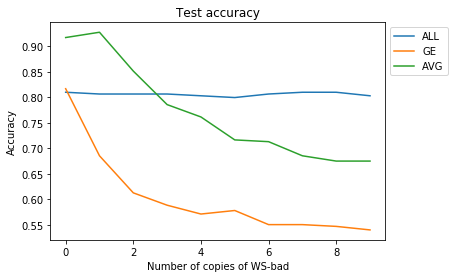

In [11]:
with open('results/json/cardio_error.json') as json_file:  
    data = json.load(json_file)
    
# constant values
all_accuracy = data['ALL']
ge_accuracy = data['GE']
avg_accuracy = data['AVG']

num_weak_signals = np.arange(10)
plt.title("Test accuracy")
plt.xlabel("Number of copies of WS-bad")
plt.ylabel("Accuracy")
plt.plot(num_weak_signals, all_accuracy, label='ALL')
plt.plot(num_weak_signals, ge_accuracy, label='GE')
plt.plot(num_weak_signals, avg_accuracy, label='AVG')
lgd = plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1))
plt.savefig('results/dependent_error.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [12]:
def paired_t_tests(accuracies, best_method, best_index, 
                       all_index, ge_index, weak_index, avg_index, start, end, fixed_test=None):
    # accuracies is a dictionary containing test accuracies of all and every baseline
    # best method is a string indicating the best performing method in the experiment either "all", "weak", "ge" or "avg"
    # index is an integer between 1-3, incdicating the model's best performer
    
    all_model = accuracies['all_test_accuracy']
    weak_model = accuracies['weak_test_accuracy']
    baseline_model = accuracies['baseline_test_accuracy']
    ge_model = accuracies['gecriteria_test_accuracy']
    
    # adjust these if experiment structure changes
    index = [i for i in range(start, end, 2)]
    fixed_b_index = [j for j in range(start + 1, end, 2)]
    
    all_tests = all_model[:, index]
    all_fixed_tests = all_model[:, fixed_b_index]
    
    ge_tests = ge_model[:, index]
    ge_fixed_tests = ge_model[:, fixed_b_index]
    
    weak_tests = weak_model[:, index]
    weak_fixed_tests = weak_model[:, fixed_b_index]
    
    avg_tests = baseline_model[:, index]
    avg_fixed_tests = baseline_model[:, fixed_b_index]
    
    num_of_experiments = int(end - start)/2
    assert all_tests.shape[1] == num_of_experiments
    assert ge_tests.shape[1] == num_of_experiments
    assert weak_tests.shape[1] == num_of_experiments
    assert avg_tests.shape[1] == num_of_experiments
    if fixed_test is None:
        best = eval(best_method+'_tests')
        print("Best method compared with ALL", stats.ttest_rel(best[best_index-1], all_tests[all_index-1]))
        print("Best method compared with GE", stats.ttest_rel(best[best_index-1], ge_tests[ge_index-1]))
        print("Best method compared with Weak signal", stats.ttest_rel(best[best_index-1], weak_tests[weak_index-1]))
        print("Best method compared with AVG", stats.ttest_rel(best[best_index-1], avg_tests[avg_index-1]))
    else:
        best = eval(best_method+'_fixed_tests')
        print("Best method compared with ALL (Fixed bound)", stats.ttest_rel(best[best_index-1], all_fixed_tests[all_index-1]))
        print("Best method compared with GE (Fixed bound)", stats.ttest_rel(best[best_index-1], ge_fixed_tests[ge_index-1]))
        print("Best method compared with Weak signal (Fixed bound)", stats.ttest_rel(best[best_index-1], weak_fixed_tests[weak_index-1]))
        print("Best method compared with AVG (Fixed bound)", stats.ttest_rel(best[best_index-1], avg_fixed_tests[avg_index-1]))
    

In [25]:
_, test_accuracies = calculate_results(credit_card)
#best, all, ge, weak, avg
paired_t_tests(test_accuracies, "all", 1, 2, 1, 1, 2, 0, 20, fixed_test=True)

Best method compared with ALL (Fixed bound) Ttest_relResult(statistic=2.2159448599358313, pvalue=0.05391969250177075)
Best method compared with GE (Fixed bound) Ttest_relResult(statistic=0.15210603796901767, pvalue=0.882458526767675)
Best method compared with Weak signal (Fixed bound) Ttest_relResult(statistic=3.6562499999999987, pvalue=0.0052661158109831765)
Best method compared with AVG (Fixed bound) Ttest_relResult(statistic=3.616408268341997, pvalue=0.005603036955826118)


In [6]:
def stacked_bar(data, series_labels, category_labels=None, 
                show_values=False, value_format="{}", y_label=None, 
                grid=False, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(1, 1, 1)
    ny = data.shape[1]
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)
    barWidth = 0.45

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        axes.append(ax.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], width=barWidth, edgecolor='white'))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)
        
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], title='Models', loc = (0.4, 0.2))

    if y_label:
        plt.ylabel(y_label)

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

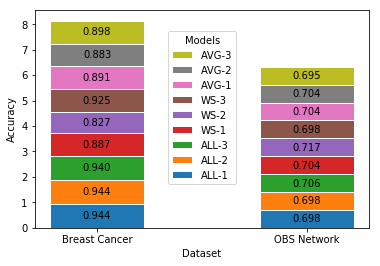

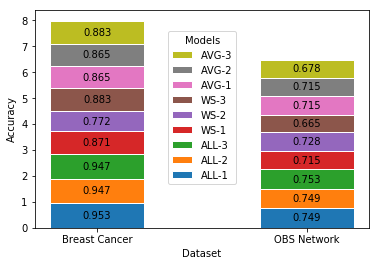

In [10]:
def plot_BcObs():
    #start is index to start plotting from
    
    #ALL-1, ALL-2, ALL-3, WS-1, WS-2, WS-3, AVG-1, AVG-2, AVG-3
    
    breast_cancer = load_results('results/json/breast_cancer.json')
    obs_network = load_results('results/json/obs_network.json')

    def appendData(start, end, result):
        temp_val = []
        temp_test = []
        for i in range(start, end):
            adv_val = result[i]['Adversarial model']['validation_accuracy']
            temp_val.append(adv_val)
            adv_test = result[i]['Adversarial model']['test_accuracy']
            temp_test.append(adv_test)
            
        j = 0
        for i in range(start, end):
            adv_val = result[i]['Weak model']['validation_accuracy'][j]
            temp_val.append(adv_val)
            adv_test = result[i]['Weak model']['test_accuracy'][j]
            temp_test.append(adv_test)
            j += 1
        
        j = 0
        for i in range(start, end):
            adv_val = result[i]['Weak model']['baseline_val_accuracy'][0]
            temp_val.append(adv_val)
            adv_test = result[i]['Weak model']['baseline_test_accuracy'][0]
            temp_test.append(adv_test)
            j += 1
            
        return temp_val, temp_test
    
    breastCancer_val, breastCancer_test = appendData(0, 3, breast_cancer)
    obsNetwork_val, obsNetwork_test = appendData(0, 3, obs_network)

    series_labels = ['ALL-1', 'ALL-2', 'ALL-3', 'WS-1', 'WS-2', 'WS-3', 'AVG-1', 'AVG-2', 'AVG-3']

    val_data = np.array([breastCancer_val, obsNetwork_val]).T
    test_data = np.array([breastCancer_test, obsNetwork_test]).T
    
    category_labels = ['Breast Cancer', 'OBS Network']

    stacked_bar(
        val_data, 
        series_labels, 
        category_labels=category_labels, 
        show_values=True, 
        value_format="{:.3f}",
        y_label="Accuracy"
    )
    
    plt.xlabel("Dataset")
    plt.savefig('bc_obs_val.png')
    plt.show()
    
    stacked_bar(
        test_data, 
        series_labels, 
        category_labels=category_labels, 
        show_values=True, 
        value_format="{:.3f}",
        y_label="Accuracy"
    )
    
    plt.xlabel("Dataset")
    plt.savefig('bc_obs_test.png')
    plt.show()
    
    return val_data, test_data
    
val_data, test_data = plot_BcObs()

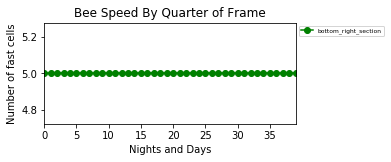

In [11]:
plt.figure()
plt.plot([5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5], '-go', label='bottom_right_section')
plt.xlim([0,39])
plt.title('Bee Speed By Quarter of Frame')
plt.xlabel("Nights and Days")
plt.ylabel("Number of fast cells")
plt.legend(loc='upper left', prop={'size':6}, bbox_to_anchor=(1,1))
plt.tight_layout(pad=7)
plt.show()